<a href="https://colab.research.google.com/github/infectedhuman/AdultSalaryPrediction/blob/main/MNIST_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
digits=load_digits()

In [2]:
type(digits.data)

numpy.ndarray

In [3]:
(digits.data.shape, digits.target.shape, digits.images.shape)

((1797, 64), (1797,), (1797, 8, 8))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

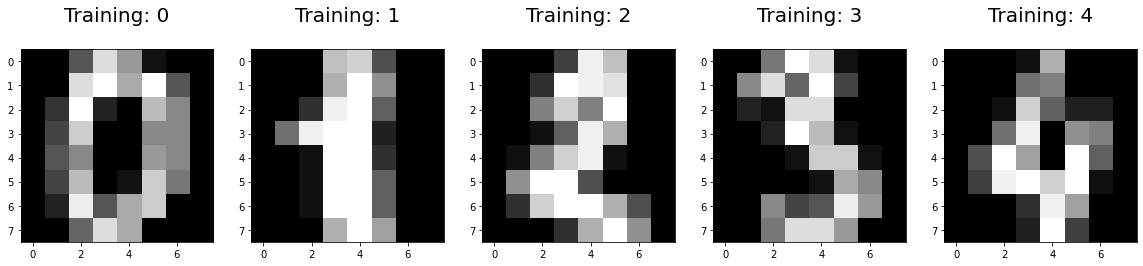

In [5]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image, (8,8)),cmap=plt.cm.gray)
  plt.title('Training: %i\n'%label, fontsize=20);

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)

In [11]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [12]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(fit_intercept=True,
                       multi_class="auto",penalty='l2',
                       solver='saga',max_iter=10000,C=50 
                       )

In [13]:
clf.fit(X_train, y_train)

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [14]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
clf.coef_.shape

(10, 64)

In [16]:
clf.coef_[0].round(2)

array([ 0.  , -0.  , -0.05,  0.1 ,  0.06, -0.14, -0.16, -0.02, -0.  ,
       -0.03, -0.04,  0.2 ,  0.09,  0.1 , -0.06, -0.02, -0.  ,  0.06,
        0.16, -0.03, -0.38,  0.23,  0.1 , -0.  , -0.  ,  0.13,  0.16,
       -0.18, -0.56,  0.02,  0.13, -0.  ,  0.  ,  0.15,  0.12, -0.17,
       -0.42,  0.05,  0.07,  0.  , -0.  , -0.07,  0.28, -0.11, -0.21,
        0.15,  0.03, -0.  , -0.  , -0.11,  0.08, -0.05,  0.2 ,  0.1 ,
       -0.04, -0.01, -0.  , -0.01, -0.09,  0.2 , -0.05, -0.07, -0.1 ,
       -0.05])

In [17]:
clf.intercept_

array([ 0.00108233, -0.07402038,  0.00522278,  0.0043603 ,  0.04618775,
        0.00021114, -0.00406714,  0.01127674,  0.04374543, -0.03399896])

In [18]:
clf.n_iter_[0]

1873

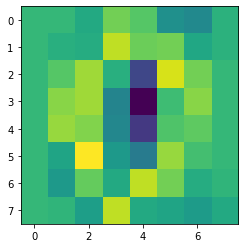

In [19]:
coef=clf.coef_.copy()
plt.imshow(coef[0].reshape(8,8).round(2))

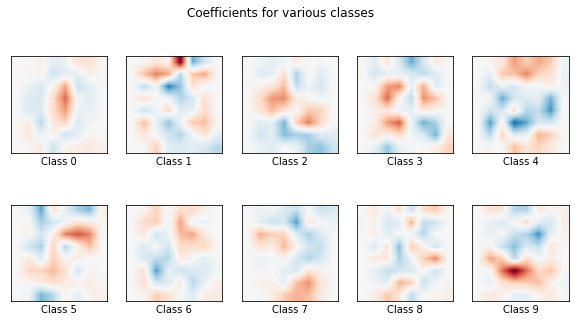

In [21]:
coef=clf.coef_.copy()
scale=np.abs(coef).max()
plt.figure(figsize=(10,5))

for i in range(10):
  coef_plot=plt.subplot(2,5,i+1)
  coef_plot.imshow(coef[i].reshape(8,8),
                   cmap=plt.cm.RdBu,
                   vmin=-scale,vmax=scale,
                   interpolation="bilinear")
  coef_plot.set_xticks(()); coef_plot.set_yticks(())
  coef_plot.set_xlabel(f'Class {i}')
  plt.suptitle('Coefficients for various classes');

In [22]:
print(clf.predict(X_test[0:9]))
print(y_test[0:9])

[2 8 2 6 6 7 1 9 8]
[2 8 2 6 6 7 1 9 8]


In [23]:
clf.score(X_train,y_train)

1.0

In [25]:
score=clf.score(X_test,y_test)
score

0.9533333333333334

In [26]:
from sklearn import metrics

In [30]:
predictions=clf.predict(X_test)
cm=metrics.confusion_matrix(y_true=y_test,y_pred=predictions,labels=clf.classes_)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 41,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])

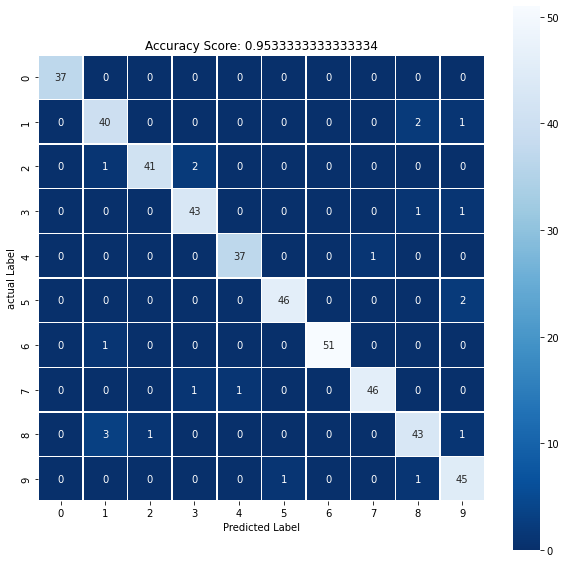

In [31]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);


In [33]:
index=0
misclassified_images=[]
for label, predict in zip(y_test, predictions):
  if label!=predict:
    misclassified_images.append(index)
  index+=1


In [34]:
print(misclassified_images)

[56, 94, 118, 124, 130, 169, 181, 196, 213, 251, 315, 325, 331, 335, 378, 398, 415, 425, 429, 430, 440]


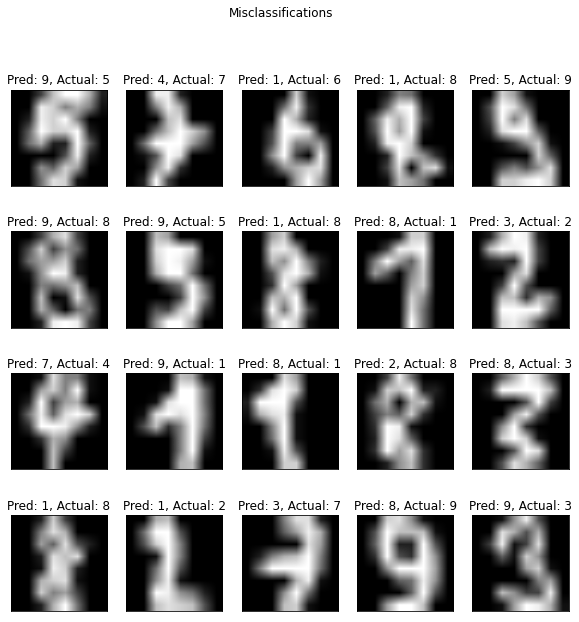

In [35]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
  p=plt.subplot(4,5,plot_index+1)
  p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray,
            interpolation='bilinear')
  p.set_xticks(()); p.set_yticks(()) # remove ticks
    
  p.set_title(f'Pred: {predictions[bad_index]}, Actual: {y_test[bad_index]}');

In [36]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554)


In [37]:
type(mnist)

sklearn.utils.Bunch

In [38]:
type(mnist.data), type(mnist.categories), type(mnist.feature_names), type(mnist.target)

(pandas.core.frame.DataFrame, NoneType, list, pandas.core.series.Series)

In [39]:
mnist.data.shape

(70000, 784)

In [40]:
mnist.target.shape

(70000,)

In [45]:
mnist.target[0]

'5'

In [48]:
mnist.target.astype('int')

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test=train_test_split(mnist.data,mnist.target.astype('int'),test_size=1/7.0,random_state=0)

In [51]:
X2_train.shape, X2_test.shape

((60000, 784), (10000, 784))

Text(0.5, 1.0, 'Frequency of diffwewnt classes - test data')

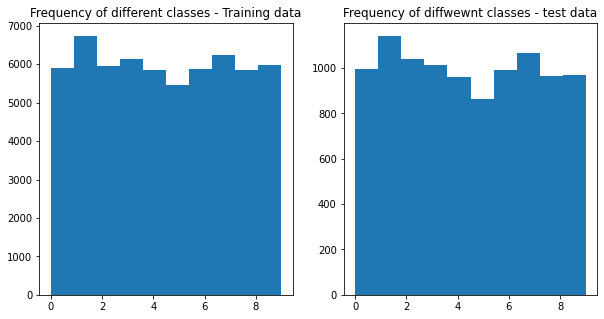

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y2_train);
plt.title('Frequency of different classes - Training data')

plt.subplot(1,2,2)
plt.hist(y2_test);
plt.title('Frequency of diffwewnt classes - test data')

In [54]:
from sklearn.linear_model import LogisticRegression
clf2=LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1',
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2,
                        n_jobs=5,
                        tol=0.01
                        )
clf2

LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [55]:
clf2.fit(X2_train, y2_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 48 epochs took 330 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  5.5min finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [56]:
clf2.classes_


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
clf2.coef_.shape

(10, 784)

In [58]:
clf.coef_[1].round(3)

array([ 0.   , -0.021, -0.097, -0.035, -0.944,  0.493,  0.185, -0.011,
       -0.   , -0.29 , -0.496, -0.386,  0.279, -0.27 , -0.385, -0.011,
       -0.   ,  0.253,  0.017,  0.672,  0.383, -0.15 ,  0.043, -0.004,
       -0.019, -0.157, -0.018,  0.027,  0.296,  0.172, -0.154, -0.   ,
        0.   ,  0.21 ,  0.063, -0.192,  0.113,  0.076, -0.182,  0.   ,
       -0.   , -0.316,  0.068,  0.395,  0.061, -0.255, -0.305, -0.033,
       -0.002, -0.11 ,  0.02 ,  0.186,  0.29 ,  0.051, -0.135,  0.075,
       -0.001,  0.005, -0.242,  0.124,  0.137,  0.111,  0.17 ,  0.277])

In [59]:
clf2.intercept_

array([-1.15720027e-04,  1.40409577e-04,  1.19002553e-04, -2.40475035e-04,
        6.89600056e-05,  8.63042678e-04, -4.35579631e-05,  2.69700077e-04,
       -8.75991818e-04, -1.85370048e-04])

In [60]:
clf2.n_iter_[0]

48

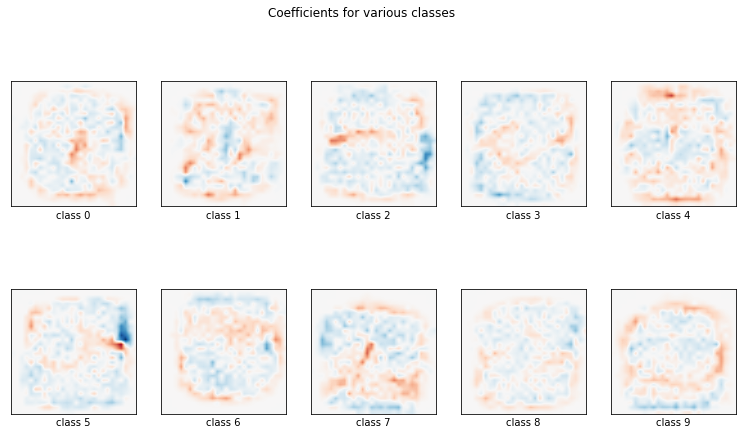

In [63]:
coef=clf2.coef_.copy()
scale=np.abs(coef).max()
plt.figure(figsize=(13,7))
for i in range(10):
  coef_plot=plt.subplot(2,5,i+1)
  coef_plot.imshow(coef[i].reshape(28,28),
                   cmap=plt.cm.RdBu,
                   vmin=-scale,vmax=scale,
                   interpolation='bilinear'                  
                   )
  coef_plot.set_xticks(());
  coef_plot.set_yticks(())

  coef_plot.set_xlabel(f'class {i}')
  plt.suptitle('Coefficients for various classes');


In [64]:
print(clf2.predict(X2_test[0:9]))
print(y2_test[0:9])

[0 4 1 2 4 7 7 1 1]
10840    0
56267    4
14849    1
62726    2
47180    7
61640    9
52730    7
21847    1
20394    1
Name: class, dtype: int64


In [65]:
clf2.score(X2_train, y2_train)

0.9375666666666667

In [68]:
score2=clf2.score(X2_test, y2_test)

In [69]:
score2

0.9194

In [70]:
from sklearn import metrics

In [71]:
predictions2=clf2.predict(X2_test)

cm=metrics.confusion_matrix(y_true=y2_test,y_pred=predictions2,labels=clf2.classes_)

In [72]:
cm


array([[ 967,    0,    1,    2,    1,    9,    9,    0,    7,    0],
       [   0, 1114,    5,    3,    1,    5,    0,    4,    7,    2],
       [   3,   14,  931,   18,   12,    1,   14,   10,   34,    3],
       [   1,    5,   33,  894,    0,   26,    2,   12,   27,   13],
       [   1,    2,    5,    1,  897,    1,   11,    9,    7,   28],
       [  10,    2,    6,   29,    9,  747,   17,    6,   30,    7],
       [   7,    3,    6,    0,   11,   18,  939,    1,    4,    0],
       [   2,    5,   13,    2,   12,    2,    1,  982,    4,   41],
       [   4,   17,    8,   18,    6,   25,    9,    2,  862,   12],
       [   4,    5,    6,   10,   35,    7,    2,   31,    8,  861]])

Text(0.5, 1.0, 'accuracy score: 0.9194')

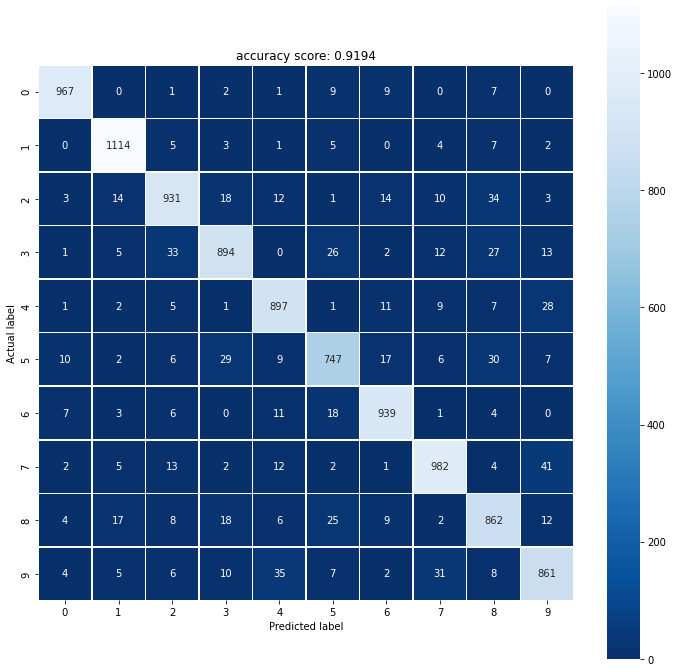

In [74]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,linewidths=0.5,square=True,cmap='Blues_r',fmt='0.4g')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title ='accuracy score: {0}'.format(score2)
plt.title(all_sample_title)

**Conclusion**



This notebook shows performing multi-class classification using logistic regression using one-vs-all technique. When run on MNIST DB, the best accuracy is still just 91%. There is still scope for improvement.
